In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
data = pd.read_csv('../input/master.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [2]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


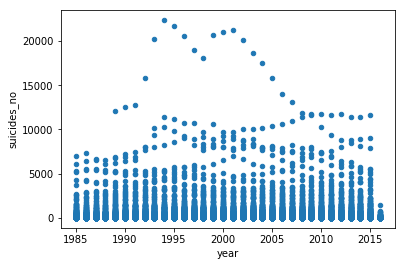

In [66]:
data.plot.scatter('year','suicides_no')

In [67]:
data.columns.values

array(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype=object)

In [ ]:
suicide rate higher in males compared to females

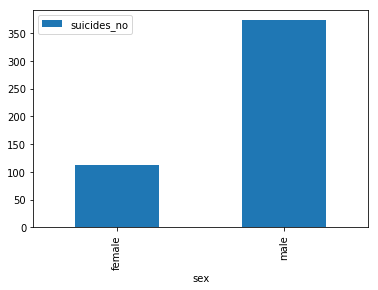

In [68]:
data[['sex','suicides_no']].groupby(['sex']).mean().sort_values(by='suicides_no', ascending=True).plot.bar()

                                                number of suicides in a country

Text(0.5, 1.0, 'age vs suicides_no')

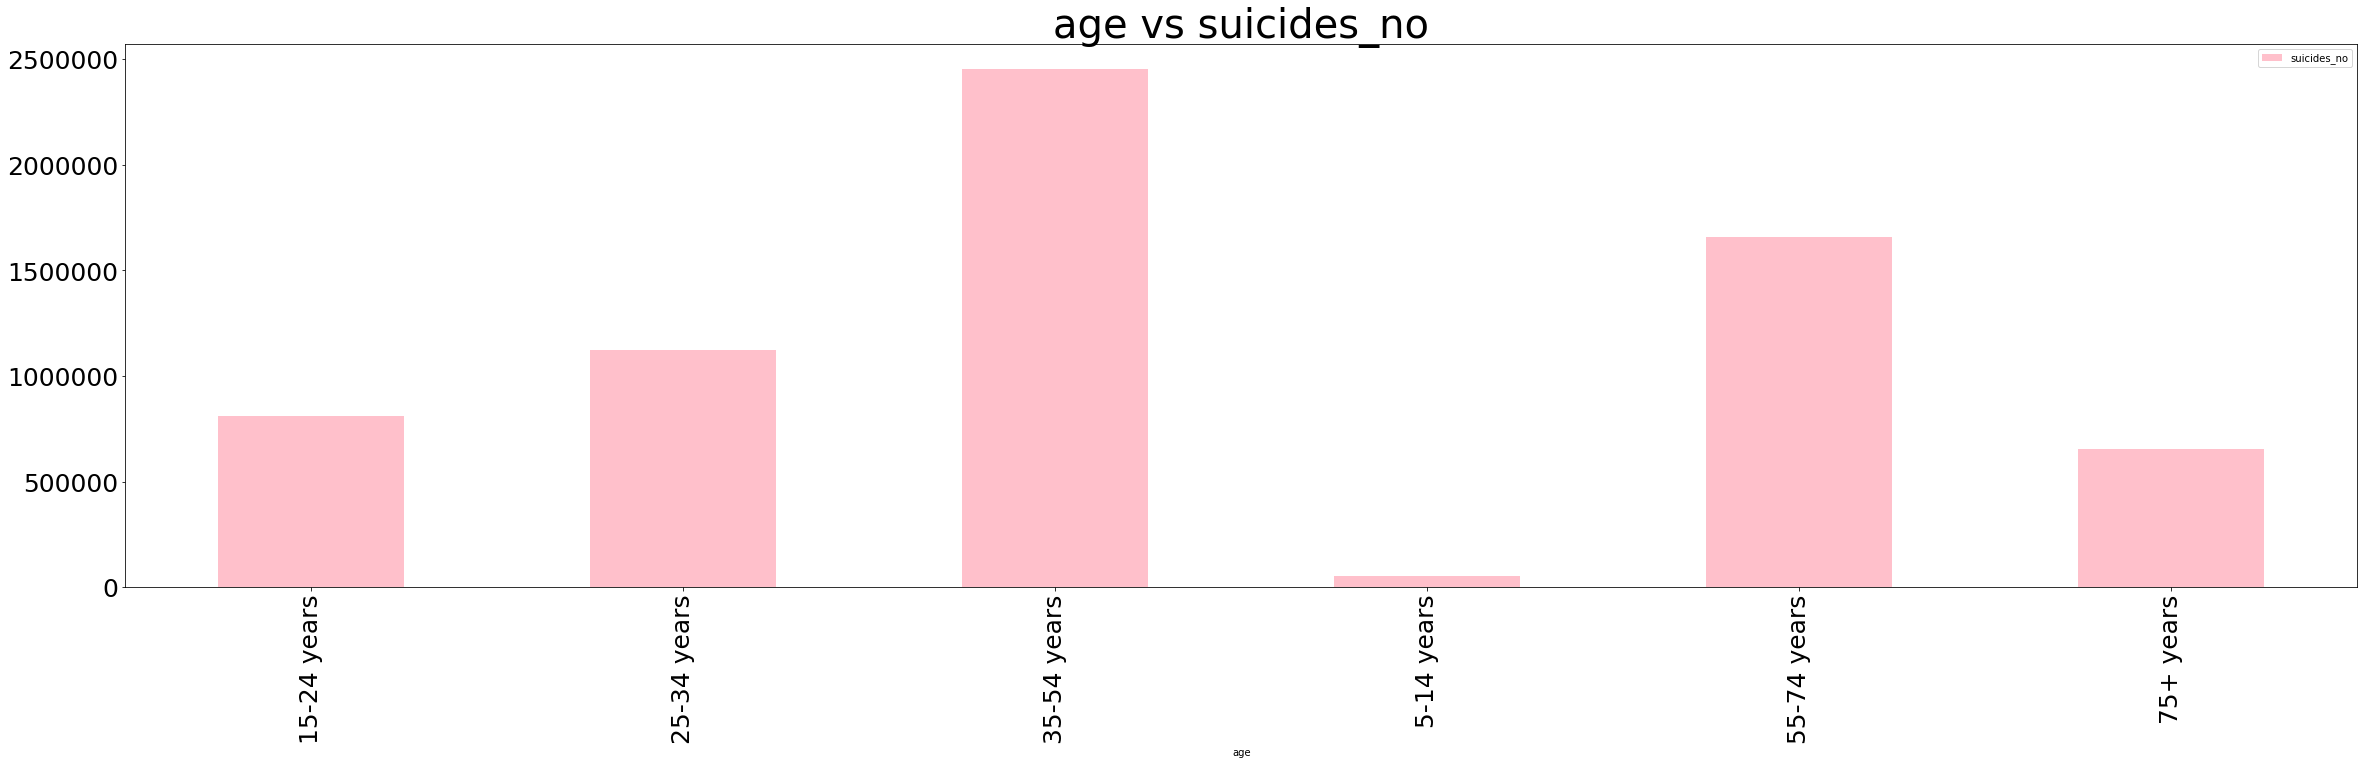

In [75]:
age_su = data[['age','suicides_no']].groupby(['age']).sum()
age_su.plot(kind='bar', figsize=(40,10), fontsize=25,color='pink').set_title('age vs suicides_no',fontsize=40)

Text(0.5, 1.0, 'country vs suicides_no')

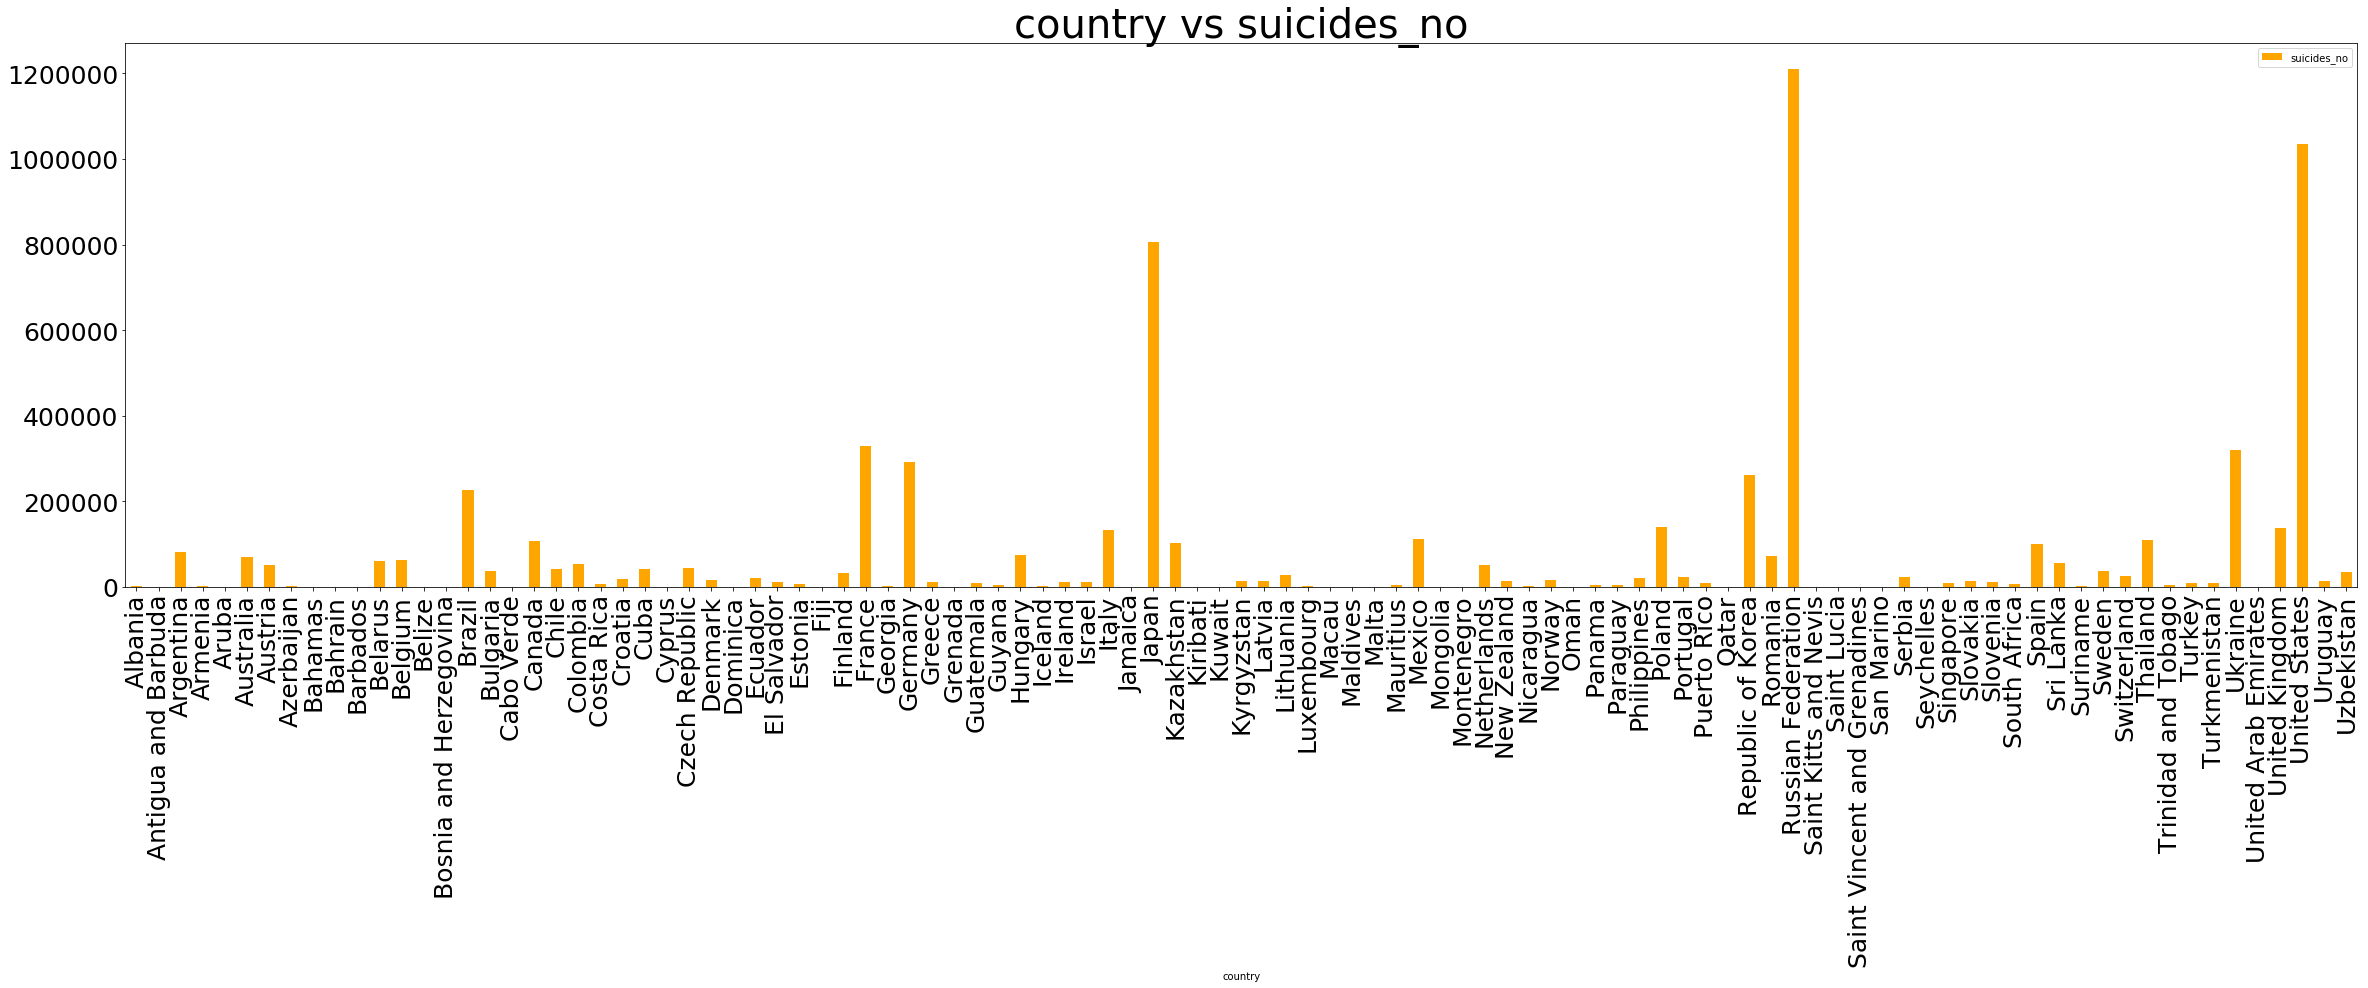

In [77]:
cont_su = data[['country','suicides_no']].groupby(['country']).sum()
cont_su.plot(kind='bar', figsize=(40,10), fontsize=25,color='orange').set_title('country vs suicides_no',fontsize=40)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

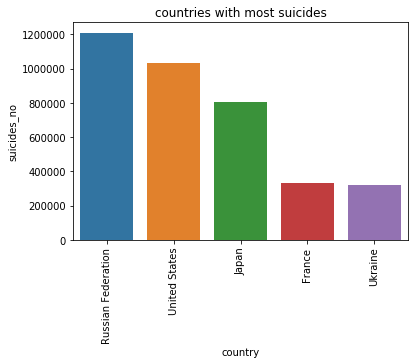

In [57]:
cont_su = cont_su.reset_index().sort_values(by='suicides_no', ascending=False)
top5 = cont_su[:5]
sns.barplot(x='country', y='suicides_no', data=top5).set_title('countries with most suicides')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

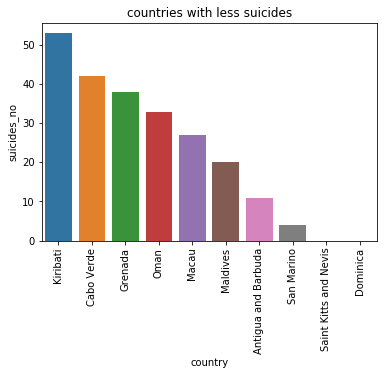

In [80]:
cont_su = cont_su.reset_index().sort_values(by='suicides_no', ascending=False)
bot = cont_su[-10:]
sns.barplot(x='country', y='suicides_no', data=bot).set_title('countries with less suicides')
plt.xticks(rotation=90)

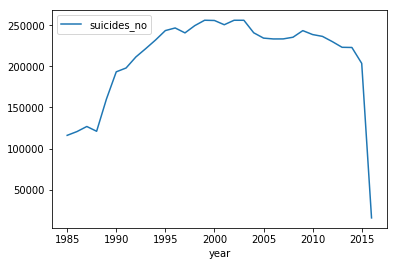

In [81]:
data[['year','suicides_no']].groupby(['year']).sum().plot()

Text(0.5, 1.0, 'countries suicides rate w.r.t sex')

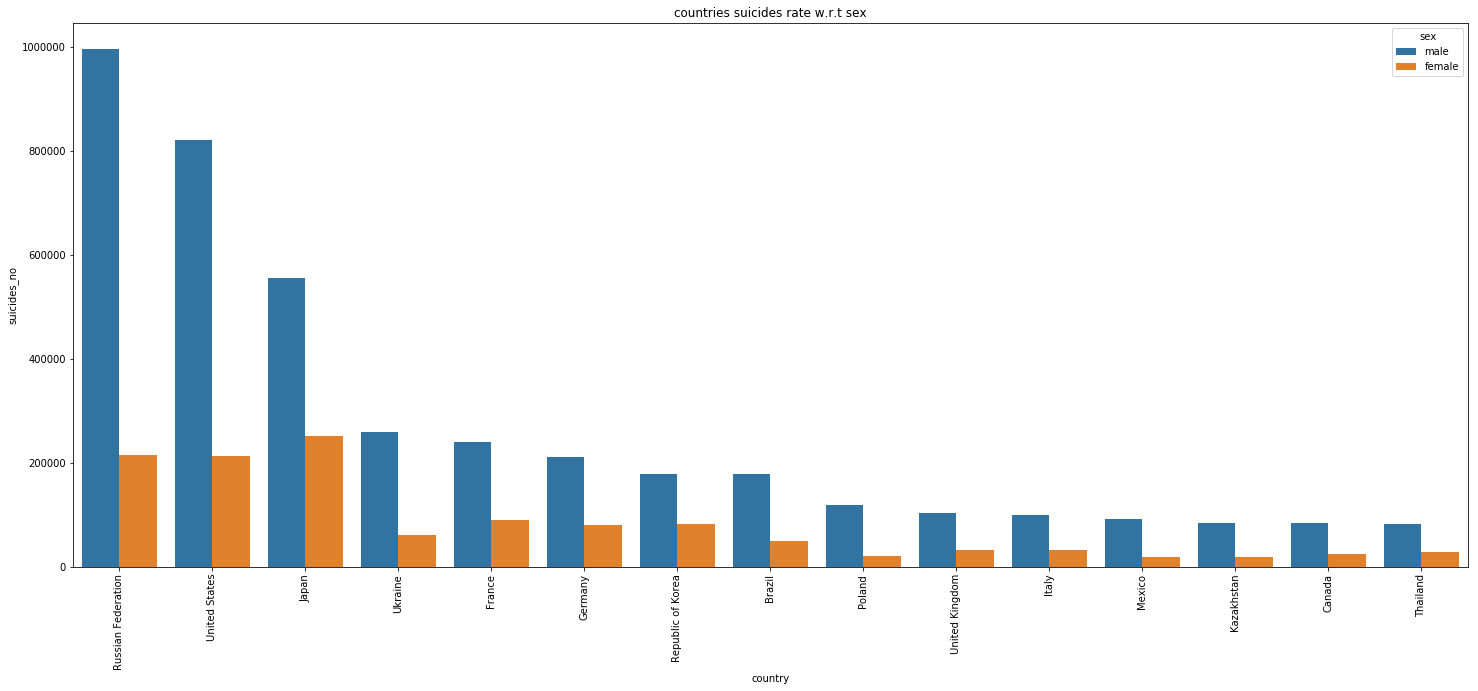

In [82]:
top15data = data.loc[data['country'].isin(top15.country)]
country_suicides_sex = top15data[['country','suicides_no','sex']].groupby(['country','sex']).sum().reset_index().sort_values(by='suicides_no', ascending=False)
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x='country', y='suicides_no', hue='sex', data=country_suicides_sex).set_title('countries suicides rate w.r.t sex')

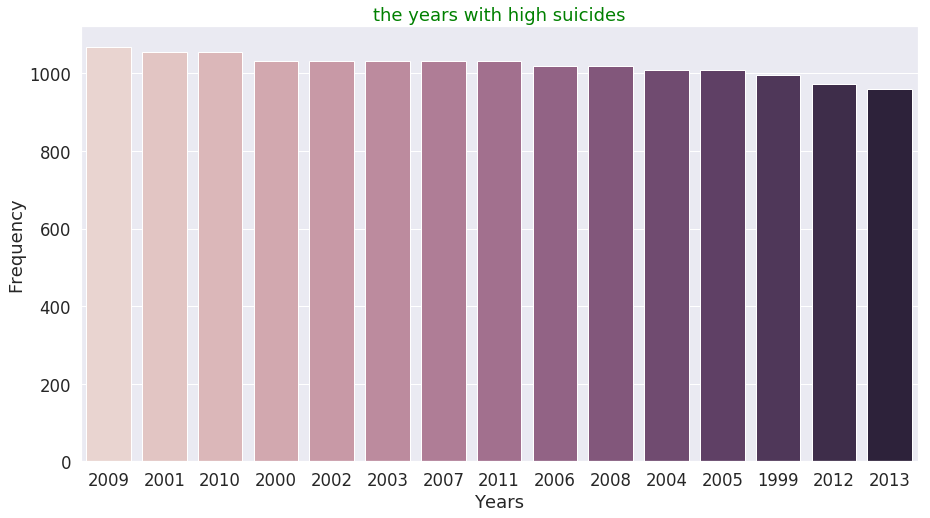

In [123]:
list_year = data.year
count_year = Counter(list_year)
most = count_year.most_common(15)

x, y = zip(*most)
x , y = list(x), list(y)

plt.figure(figsize = (15, 8))
sns.barplot(x = x, y = y, palette = sns.cubehelix_palette(len(x)), order = x)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('the years with high suicides',color='green')
plt.show()

Text(0.5, 1.0, 'females suicide rate w.r.t country')

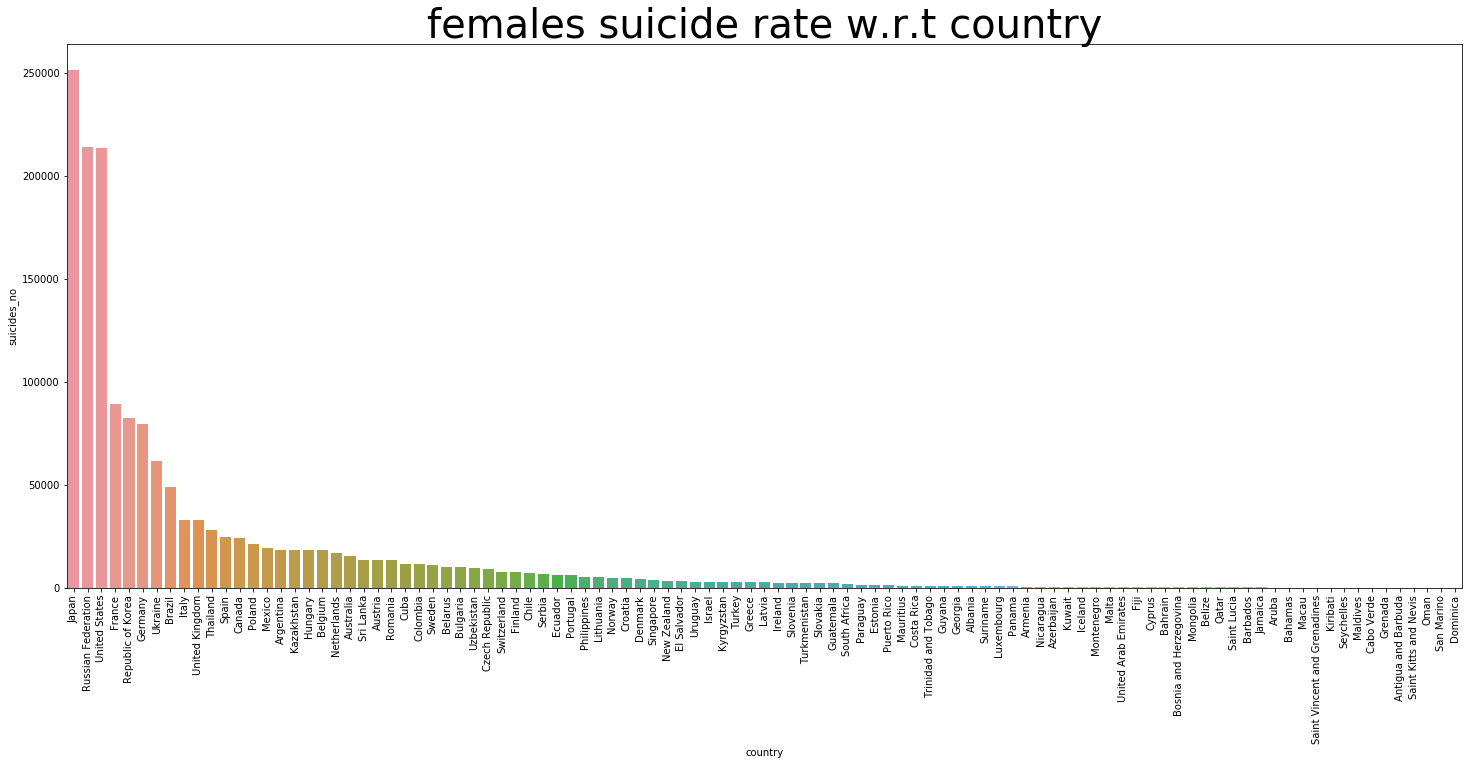

In [88]:
female_data = data.loc[data['sex']=='female']
female_suicides = female_data[['country','suicides_no','sex']].groupby(['country','sex']).sum().reset_index().sort_values(by='suicides_no', ascending=False)
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x='country', y='suicides_no', data=female_suicides).set_title('females suicide rate w.r.t country',fontsize=40)

In [111]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Text(0.5, 1.0, 'generation vs suicides_no')

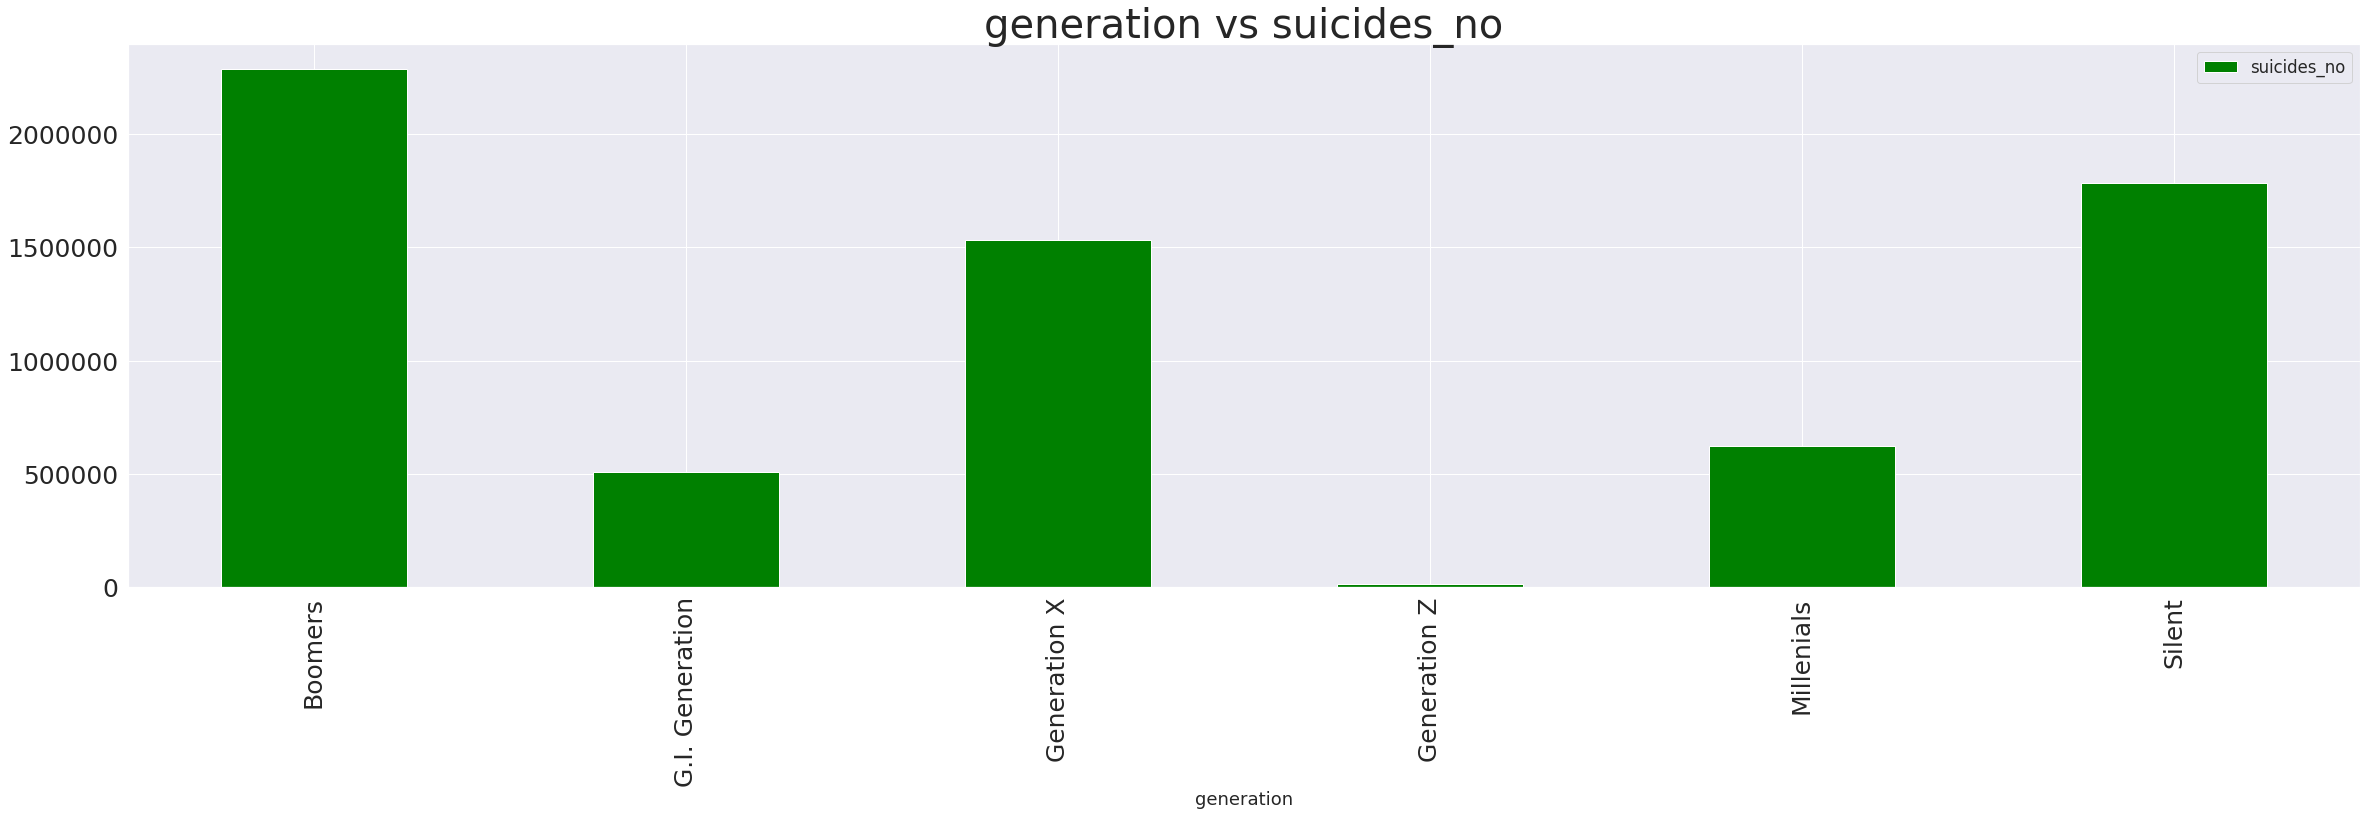

In [114]:
cont_su = data[['generation','suicides_no']].groupby(['generation']).sum()
cont_su.plot(kind='bar', figsize=(40,10), fontsize=25,color='green').set_title('generation vs suicides_no',fontsize=40)

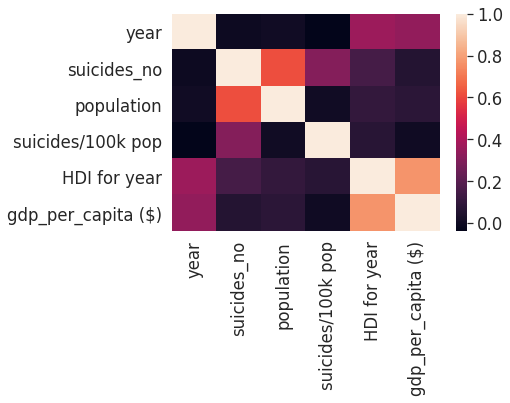

In [126]:
sns.heatmap(data.corr())

**predicting suicides using regression******

In [26]:
data=pd.get_dummies(data)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
y=data['suicides_no']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data,y, test_size=0.2,random_state=0)

In [30]:
x_train=data.drop('suicides_no',axis=1)

In [31]:
x_test=data.drop('suicides_no',axis=1)

In [32]:
y_train=data['suicides_no']

In [33]:
y_test=data['suicides_no']

In [34]:
x_train.shape,y_train.shape

((27820, 4762), (27820,))

In [ ]:
x_test.shape,y_test.shape

In [35]:
x_train=pd.get_dummies(x_train)

In [36]:
x_test=pd.get_dummies(x_test)

In [37]:
x_train.fillna(0,inplace=True)

In [38]:
x_test.fillna(0,inplace=True)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lg=LinearRegression()

In [41]:
lg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
pred=lg.predict(x_test)

In [43]:
lg.score(x_train,y_train)

0.5953166877685321

In [129]:
pred

array([ 86.87278954, 176.21883267, -46.86637945, ..., 189.76655762,
        54.014539  , -16.12739831])